In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../data/processed/atc_travel_survey_final_data.csv')

C:\Users\USVV724227\AppData\Local\Temp\ipykernel_43512\1384569684.py:1: DtypeWarning: Columns (1,10,21,23,24,30,31,45,52,54,56,57,60,72,82,89,90,93,99,105,107,118,119,120,123,133,136,139,143,159,160,165,174,176,177,179) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/processed/atc_travel_survey_final_data.csv')


In [3]:
df.head()

,unique_id,respondentid,date_completed,time_completed,is_pilot,is_self_administered,record_type_synthetic,access_mode_frequency,access_mode_frequency_label,access_mode,...,transit_boarding_stop_name,transit_routes_list,trip_arrival_time,trip_arrival_time_label,trip_start_time,trip_start_time_label,weight_departing_and_arriving,weight_departing_only,weight_non_sas_departing_only,weight_departing_only_with_time_of_day
0,1,5473,2024-10-04,08:41:12,False,False,0,NaN,NaN,NaN,...,NaN,NaN,1.0,FIVE_TO_FIVE_THIRTY,1.0,FIVE_TO_FIVE_THIRTY,10.840259,10.854572,19.179428,10.874504
1,2,5476,2024-10-04,08:40:04,False,False,0,NaN,NaN,1.0,...,MTS_1_992_01_10833,MTS_1_Blue,10.0,NINE_THIRTY_TO_TEN,8.0,EIGHT_THIRTY_TO_NINE,6.487856,6.534190,8.687559,6.502862
2,3,5489,2024-10-04,08:51:36,False,False,0,NaN,NaN,NaN,...,NaN,NaN,3.0,SIX_TO_SIX_THIRTY,3.0,SIX_TO_SIX_THIRTY,10.840259,10.854572,19.179428,10.874504
3,4,5558,2024-10-04,10:32:58,False,False,0,NaN,NaN,1.0,...,MTS_1_992_01_99342,NaN,14.0,ELEVEN_THIRTY_TO_NOON,13.0,ELEVEN_TO_ELEVEN_THIRTY,6.487856,6.534190,8.687559,6.502862
4,5,5593,2024-10-04,11:09:46,False,False,0,NaN,NaN,1.0,...,MTS_1_992_01_99342,MTS_1_Blue,15.0,NOON_TO_TWELVE_THIRTY,15.0,NOON_TO_TWELVE_THIRTY,6.487856,6.534190,8.687559,6.502862


In [4]:
df.shape

(9098, 241)

In [5]:
working_df = df[
    (df['record_type_synthetic'] == 0) &
    (~df['passenger_segment_label'].isin(['RESIDENT_ARRIVING', 'VISITOR_ARRIVING']))
]
working_df.shape

(4786, 241)

In [6]:
working_df['marketsegment_label'].value_counts()

marketsegment_label
PASSENGER    4127
EMPLOYEE      659
Name: count, dtype: int64

In [7]:
working_df['resident_visitor_purpose_label'].value_counts(normalize=True)

resident_visitor_purpose_label
VISITOR_NON_BUSINESS     0.334308
RESIDENT_NON_BUSINESS    0.263686
VISITOR_BUSINESS         0.173005
EMPLOYEE                 0.137693
RESIDENT_BUSINESS        0.091308
Name: proportion, dtype: float64

In [8]:
working_df['passenger_segment_label'].value_counts()

passenger_segment_label
VISITOR_DEPARTING     2428
RESIDENT_DEPARTING    1699
Name: count, dtype: int64

In [9]:
def calculate_summary(df, group_col, if_use_party_size = False):
    df = df.copy()

    # Calculate the effective weight
    if if_use_party_size:
        df['weighted_value'] = df['weight_departing_only'] * df['party_size_flight']
    else:
        df['weighted_value'] = df['weight_departing_only']

    # Group and summarize
    summary = df.groupby(group_col)['weighted_value'].sum().reset_index()

    # Calculate percentages
    total = summary['weighted_value'].sum()
    summary['percentage'] = (summary['weighted_value'] / total)

    # Round percentage
    summary['percentage'] = summary['percentage'].round(4)

    # Set the group column as index and keep only percentage
    summary = summary.set_index(group_col)[['percentage']]

    # Sort by descending percentage
    summary = summary.sort_values(by='percentage', ascending=False)

    return summary


In [10]:
passenger_df = working_df[working_df['marketsegment_label']=='PASSENGER']
employee_df = working_df[working_df['marketsegment_label']=='EMPLOYEE']

In [11]:
passenger_df.shape

(4127, 241)

In [12]:
employee_df.shape

(659, 241)

In [13]:
def calculate_summary_all(df, group_col, if_use_party_size = False):
    df = df.copy()

    # Calculate the effective weight
    if if_use_party_size:
        df['weighted_value'] = df['weight_departing_only'] * df['party_size_flight']
    else:
        df['weighted_value'] = df['weight_departing_only']

    # Group and summarize
    summary = df.groupby(group_col)['weighted_value'].sum().reset_index()

    # Calculate percentages
    total = summary['weighted_value'].sum()
    summary['percentage'] = (summary['weighted_value'] / total)

    # Round percentage
    summary['percentage'] = summary['percentage'].round(4)

    # Set the group column as index and keep only percentage

    # Sort by descending percentage
    summary = summary.sort_values(by='percentage', ascending=False)

    return summary

In [14]:
calculate_summary_all(passenger_df, 'number_vehicles_label', False)

,number_vehicles_label,weighted_value,percentage
8,TWO,5339.280194,0.4329
7,THREE,2584.296766,0.2095
4,ONE,2406.837414,0.1951
2,FOUR,712.927569,0.0578
3,NONE,573.316452,0.0465
1,FIVE,441.006573,0.0358
0,EIGHT_OR_MORE,133.235227,0.0108
6,SIX,83.779350,0.0068
5,SEVEN,58.925682,0.0048


In [15]:
42.7  +26.3

69.0

In [16]:
calculate_summary(working_df[working_df['passenger_segment_label']=='RESIDENT_DEPARTING'], 'main_mode_label')

,percentage
main_mode_label,
PERSONAL_CAR_DROPPED_OFF_PICKED_UP,0.4348
RIDEHAIL_TAXI,0.3420
PERSONAL_CAR_PARKED,0.1687
SHARED_SHUTTLE_VAN,0.0160
RENTAL_CAR,0.0124
WALK,0.0067
OTHER,0.0066
BUS_992,0.0065
PUBLIC_TRANSPORTATION,0.0041


In [17]:
calculate_summary(working_df, 'convention_center_label')

,percentage
convention_center_label,
NO,0.8854
YES,0.1126
REFUSED,0.0020


In [18]:
calculate_summary(working_df[working_df['passenger_segment_label']=='RESIDENT_DEPARTING'], 'household_income_label')

,percentage
household_income_label,
PREFER_NOT_TO_SAY,0.2391
BETWEEN_100K_150K,0.1494
BETWEEN_150_199K,0.1317
BETWEEN_200_299K,0.1101
BETWEEN_75K_100K,0.0924
MORE_THAN_300K,0.0727
BETWEEN_60K_75K,0.0520
LESS_THAN_15K,0.0248
BETWEEN_50K_60K,0.0243


In [19]:
calculate_summary(working_df[working_df['passenger_segment_label']=='VISITOR_DEPARTING'], 'main_mode_label')

,percentage
main_mode_label,
RIDEHAIL_TAXI,0.3761
RENTAL_CAR,0.2984
PERSONAL_CAR_DROPPED_OFF_PICKED_UP,0.2140
SHARED_SHUTTLE_VAN,0.0715
OTHER,0.0216
BUS_992,0.0074
PERSONAL_CAR_PARKED,0.0048
WALK,0.0024
AIRPORT_FLYER_SHUTTLE,0.0021


### Employees

In [20]:
employee_df = working_df[working_df['marketsegment_label']=='EMPLOYEE']

In [21]:
calculate_summary(employee_df, 'employer_label').head(10)

,percentage
employer_label,
SDCRAA_SDIA,0.2890
OTHER_SPECIFY,0.2647
ALASKA_AIRLINES,0.0648
TRANSPORTATION_SECURITY_ADMINISTRATION_TSA,0.0460
SOUTHWEST_AIRLINES,0.0415
UNITED_AIRLINES,0.0415
DELTA_AIRLINES,0.0358
AMERICAN_AIRLINES,0.0187
HUDSON_NEWS,0.0145


In [22]:
calculate_summary(employee_df, 'number_commute_days_label')

,percentage
number_commute_days_label,
FIVE,0.5436
FOUR,0.1212
THREE,0.1117
TWO,0.0957
ONE,0.0563
SIX,0.0404
SEVEN,0.0228
ZERO,0.0083


In [23]:
calculate_summary(employee_df, 'occupation_label')

,percentage
occupation_label,
OTHER_SPECIFY,0.3227
RETAIL_RESTAURANT,0.1152
GENERAL_AND_OPERATIONS_MANAGERS,0.0918
TICKET_AGENT,0.0704
BLDG_MAINTENANCE_CLEANING,0.0579
FLIGHT_ATTENDANT,0.0558
PROGRAM_AND_PROJECT_MANAGERS,0.0463
TSA,0.0406
CARGO_AGENT,0.0372


In [24]:
def time_summary(df, group_col, if_use_party_size = False):
    df = df.copy()

    # Calculate the effective weight
    if if_use_party_size:
        df['weighted_value'] = df['weight_departing_only'] * df['party_size_flight']
    else:
        df['weighted_value'] = df['weight_departing_only']

    # Group and summarize
    summary = df.groupby(group_col)['weighted_value'].sum().reset_index()

    # Calculate percentages
    total = summary['weighted_value'].sum()
    summary['percentage'] = (summary['weighted_value'] / total)

    # Round percentage
    summary['percentage'] = summary['percentage'].round(4)

    # Set the group column as index and keep only percentage
    summary = summary.set_index(group_col)[['percentage']]


    return summary

In [25]:
time_summary(employee_df, 'shift_start_time')

,percentage
shift_start_time,
1.0,0.0472
2.0,0.0325
3.0,0.1068
4.0,0.0391
5.0,0.0985
6.0,0.0372
7.0,0.1127
8.0,0.0542
9.0,0.0638


In [26]:
time_summary(employee_df, 'shift_end_time')

,percentage
shift_end_time,
1.0,0.0036
2.0,0.0011
3.0,0.0090
4.0,0.0101
5.0,0.0065
6.0,0.0018
7.0,0.0018
8.0,0.0029
9.0,0.0072


In [27]:
calculate_summary(employee_df, 'age_label')

,percentage
age_label,
AGE_35_39,0.1378
AGE_30_34,0.1330
AGE_25_29,0.1308
AGE_40_44,0.1061
AGE_55_59,0.1046
AGE_45_49,0.0909
AGE_50_54,0.0881
AGE_60_64,0.0791
AGE_20_24,0.0558


In [28]:
calculate_summary(employee_df, 'number_workers_label')

,percentage
number_workers_label,
TWO,0.5077
ONE,0.2815
THREE,0.1448
FOUR,0.0490
FIVE,0.0084
SIX,0.0050
NINE,0.0018
SEVEN,0.0018


In [29]:
calculate_summary(employee_df, 'origin_pmsa_label')

,percentage
origin_pmsa_label,
CENTRAL,0.3653
NORTH_CITY,0.2086
SOUTH_SUBURBAN,0.1720
EAST_SUBURBAN,0.1307
DOWNTOWN,0.0499
EXTERNAL,0.0384
NORTH_COUNTY_WEST,0.0187
NORTH_COUNTY_EAST,0.0163


In [30]:
calculate_summary(employee_df, 'commute_mode_decision_label')

,percentage
commute_mode_decision_label,
DEPENDS_ON_TIME_OF_DAY,0.3133
SHORTEST_DOOR_TO_DOOR_TRAVEL_TIME,0.1992
LOWEST_COST,0.1719
MOST_COMFORTABLE,0.1632
SMALLEST_CHANCE_FOR_DELAYS,0.0560
REFUSED,0.0498
OTHER_SPECIFY,0.0466


In [31]:
pd.crosstab(employee_df['household_income_label'], employee_df['main_mode_label'])

main_mode_label,AIRPORT_FLYER_SHUTTLE,BUS_992,MICROMOBILITY_PERSONAL,MICROMOBILITY_SHARED,PERSONAL_CAR_DROPPED_OFF_PICKED_UP,PERSONAL_CAR_PARKED,PUBLIC_TRANSPORTATION,RENTAL_CAR,RIDEHAIL_TAXI,SHARED_SHUTTLE_VAN,WALK
household_income_label,,,,,,,,,,,
BETWEEN_100K_150K,11,5,1,0,5,63,0,0,3,3,0
BETWEEN_150_199K,5,5,4,0,1,52,0,0,0,4,0
BETWEEN_15K_20K,1,0,0,0,0,1,0,0,1,0,0
BETWEEN_200_299K,0,2,1,1,0,39,0,0,1,0,0
BETWEEN_20K_25K,1,2,0,0,0,2,0,0,0,0,0
BETWEEN_25K_30K,3,1,0,0,1,2,0,0,1,0,0
BETWEEN_30K_35K,2,3,0,0,1,7,0,0,0,0,0
BETWEEN_35K_40K,0,2,0,0,1,8,0,0,0,0,0
BETWEEN_40K_45K,2,2,1,0,0,10,1,0,1,0,0


In [32]:
import pandas as pd

def crosstab_by_purpose(df, metric_col, purpose_col='resident_visitor_purpose_label'):
    """
    Creates a percentage-only crosstab showing distribution of a metric 
    by resident/visitor purpose (excluding 'Employee').

    Parameters:
    - df (pd.DataFrame): Input DataFrame
    - metric_col (str): The metric column to analyze (e.g., 'party_size', 'bags')
    - purpose_col (str): Column indicating purpose groups (default: 'resident_visitor_purpose')

    Returns:
    - pd.DataFrame: Crosstab with row-wise percentages (normalized by purpose group)
    """
    # Filter out 'Employee'
    df = df[df[purpose_col] != 'Employee']

    # Generate percentage crosstab
    percent_ct = pd.crosstab(df[purpose_col], df[metric_col], normalize='index') * 100

    # Add Total column (always 100%)
    percent_ct['Total'] = 100.0

    # Format percentages
    percent_ct = percent_ct.round(1).astype(str) + '%'

    # Rename for clarity
    percent_ct.index.name = 'Resident/Visitor Purpose'
    percent_ct.columns.name = metric_col

    return percent_ct


In [33]:
crosstab_by_purpose(working_df, 'party_size_flight')

party_size_flight,1,2,3,4,5,6,7,8,Total
Resident/Visitor Purpose,,,,,,,,,
EMPLOYEE,100.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,100.0%
RESIDENT_BUSINESS,80.8%,11.9%,4.3%,1.1%,0.7%,0.0%,0.0%,1.1%,100.0%
RESIDENT_NON_BUSINESS,54.7%,29.5%,9.1%,3.2%,1.9%,1.0%,0.5%,0.2%,100.0%
VISITOR_BUSINESS,73.6%,15.8%,4.1%,2.1%,1.1%,1.0%,0.2%,2.2%,100.0%
VISITOR_NON_BUSINESS,50.5%,32.3%,8.8%,4.1%,2.1%,1.4%,0.4%,0.4%,100.0%


### Session 2

In [34]:
working_df

,unique_id,respondentid,date_completed,time_completed,is_pilot,is_self_administered,record_type_synthetic,access_mode_frequency,access_mode_frequency_label,access_mode,...,transit_boarding_stop_name,transit_routes_list,trip_arrival_time,trip_arrival_time_label,trip_start_time,trip_start_time_label,weight_departing_and_arriving,weight_departing_only,weight_non_sas_departing_only,weight_departing_only_with_time_of_day
0,1,5473,2024-10-04,08:41:12,False,False,0,NaN,NaN,NaN,...,NaN,NaN,1.0,FIVE_TO_FIVE_THIRTY,1.0,FIVE_TO_FIVE_THIRTY,10.840259,10.854572,19.179428,10.874504
1,2,5476,2024-10-04,08:40:04,False,False,0,NaN,NaN,1.0,...,MTS_1_992_01_10833,MTS_1_Blue,10.0,NINE_THIRTY_TO_TEN,8.0,EIGHT_THIRTY_TO_NINE,6.487856,6.534190,8.687559,6.502862
2,3,5489,2024-10-04,08:51:36,False,False,0,NaN,NaN,NaN,...,NaN,NaN,3.0,SIX_TO_SIX_THIRTY,3.0,SIX_TO_SIX_THIRTY,10.840259,10.854572,19.179428,10.874504
3,4,5558,2024-10-04,10:32:58,False,False,0,NaN,NaN,1.0,...,MTS_1_992_01_99342,NaN,14.0,ELEVEN_THIRTY_TO_NOON,13.0,ELEVEN_TO_ELEVEN_THIRTY,6.487856,6.534190,8.687559,6.502862
4,5,5593,2024-10-04,11:09:46,False,False,0,NaN,NaN,1.0,...,MTS_1_992_01_99342,MTS_1_Blue,15.0,NOON_TO_TWELVE_THIRTY,15.0,NOON_TO_TWELVE_THIRTY,6.487856,6.534190,8.687559,6.502862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4966,5375,2944,2024-11-21,NaN,False,True,0,NaN,NaN,NaN,...,NaN,NaN,22.0,FIFTEEN_THIRTY_TO_SIXTEEN,22.0,FIFTEEN_THIRTY_TO_SIXTEEN,1.591825,1.568720,NaN,1.685746
4967,5376,2974,2024-11-22,NaN,False,True,0,2.0,THREE_TO_FIVE_PER_YEAR,NaN,...,NaN,NaN,5.0,SEVEN_TO_SEVEN_THIRTY,4.0,SIX_THIRTY_TO_SEVEN,28.657105,44.535111,NaN,46.622300
4968,5377,3011,2024-11-22,NaN,False,True,0,1.0,ONCE_OR_TWICE_PER_YEAR,1.0,...,MTS_1_992_01_10094,NaN,24.0,SIXTEEN_THIRTY_TO_SEVENTEEN,23.0,SIXTEEN_TO_SIXTEEN_THIRTY,0.864710,0.842120,NaN,1.554644
4969,5378,3044,2024-11-23,NaN,False,True,0,2.0,THREE_TO_FIVE_PER_YEAR,NaN,...,NaN,NaN,12.0,TEN_THIRTY_TO_ELEVEN,12.0,TEN_THIRTY_TO_ELEVEN,2.533906,2.460884,NaN,1.713020


In [35]:
working_df['weighted_value'] = working_df['weight_departing_only'] * working_df['party_size_flight']
working_df.groupby('passenger_segment_label')['weighted_value'].sum()

C:\Users\USVV724227\AppData\Local\Temp\ipykernel_43512\1709487160.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  working_df['weighted_value'] = working_df['weight_departing_only'] * working_df['party_size_flight']


passenger_segment_label
RESIDENT_DEPARTING    13012.097897
VISITOR_DEPARTING     24870.897819
Name: weighted_value, dtype: float64

In [36]:
13015/(13015+24867)

0.3435668655298031

In [37]:
working_df['marketsegment_label'].value_counts()

marketsegment_label
PASSENGER    4127
EMPLOYEE      659
Name: count, dtype: int64

In [38]:
employee_df['party_size_flight']

0      1
1      1
2      1
3      1
4      1
      ..
654    1
655    1
656    1
657    1
658    1
Name: party_size_flight, Length: 659, dtype: int64

In [39]:
employee_df['weight_departing_only'].sum()

np.float64(5998.569418740257)

In [40]:
employee_df[['main_mode_label', 'household_income_label']]

,main_mode_label,household_income_label
0,PERSONAL_CAR_PARKED,BETWEEN_60K_75K
1,BUS_992,BETWEEN_150_199K
2,PERSONAL_CAR_PARKED,BETWEEN_30K_35K
3,BUS_992,PREFER_NOT_TO_SAY
4,BUS_992,PREFER_NOT_TO_SAY
...,...,...
654,BUS_992,BETWEEN_25K_30K
655,PERSONAL_CAR_PARKED,BETWEEN_150_199K
656,PERSONAL_CAR_PARKED,BETWEEN_200_299K
657,PERSONAL_CAR_PARKED,BETWEEN_150_199K


In [41]:
summary_df = (
    employee_df.groupby(['household_income_label', 'main_mode_label'])['weight_departing_only']
    .sum()
    .reset_index()
    .rename(columns={'weight_departing_only': 'weight_sum'})
)

# Pivot to get a matrix of weights
pivot_df = summary_df.pivot(index='household_income_label', columns='main_mode_label', values='weight_sum').fillna(0)

# Compute row-wise percentages
percent_df = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

# Round for readability
percent_df = percent_df.round(1)
percent_df

main_mode_label,AIRPORT_FLYER_SHUTTLE,BUS_992,MICROMOBILITY_PERSONAL,MICROMOBILITY_SHARED,PERSONAL_CAR_DROPPED_OFF_PICKED_UP,PERSONAL_CAR_PARKED,PUBLIC_TRANSPORTATION,RENTAL_CAR,RIDEHAIL_TAXI,SHARED_SHUTTLE_VAN,WALK
household_income_label,,,,,,,,,,,
BETWEEN_100K_150K,2.1,3.8,1.3,0.0,6.3,79.1,0.0,0.0,3.8,3.8,0.0
BETWEEN_150_199K,1.1,4.6,6.2,0.0,1.5,80.3,0.0,0.0,0.0,6.2,0.0
BETWEEN_15K_20K,6.9,0.0,0.0,0.0,0.0,46.5,0.0,0.0,46.5,0.0,0.0
BETWEEN_200_299K,0.0,2.8,2.3,2.3,0.0,90.3,0.0,0.0,2.3,0.0,0.0
BETWEEN_20K_25K,4.4,35.9,0.0,0.0,0.0,59.7,0.0,0.0,0.0,0.0,0.0
BETWEEN_25K_30K,8.8,11.9,0.0,0.0,19.8,39.6,0.0,0.0,19.8,0.0,0.0
BETWEEN_30K_35K,2.9,17.9,0.0,0.0,9.9,69.3,0.0,0.0,0.0,0.0,0.0
BETWEEN_35K_40K,0.0,11.8,0.0,0.0,9.8,78.4,0.0,0.0,0.0,0.0,0.0
BETWEEN_40K_45K,2.0,8.3,6.9,0.0,0.0,69.0,6.9,0.0,6.9,0.0,0.0


In [42]:
income_mapping = {
    'LESS_THAN_15K': '<50K',
    'BETWEEN_15K_20K': '<50K',
    'BETWEEN_20K_25K': '<50K',
    'BETWEEN_25K_30K': '<50K',
    'BETWEEN_30K_35K': '<50K',
    'BETWEEN_35K_40K': '<50K',
    'BETWEEN_40K_45K': '<50K',
    'BETWEEN_45K_50K': '<50K',
    
    'BETWEEN_50K_60K': '50K–100K',
    'BETWEEN_60K_75K': '50K–100K',
    'BETWEEN_75K_100K': '50K–100K',
    
    'BETWEEN_100K_150K': '100K–200K',
    'BETWEEN_150_199K': '100K–200K',
    'BETWEEN_200_299K': '200K+',
    'MORE_THAN_300K': '200K+',
    
    'PREFER_NOT_TO_SAY': 'UNKNOWN'
}
employee_df['income_group'] = employee_df['household_income_label'].map(income_mapping)


C:\Users\USVV724227\AppData\Local\Temp\ipykernel_43512\4281808768.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employee_df['income_group'] = employee_df['household_income_label'].map(income_mapping)


In [43]:
mode_mapping = {
    'BUS_992': 'BUS',
    'PUBLIC_TRANSPORTATION': 'BUS',
    'PERSONAL_CAR_PARKED': 'CAR',
    'PERSONAL_CAR_DROPPED_OFF_PICKED_UP': 'CAR',
    'MICROMOBILITY_PERSONAL': 'MICROMOBILITY',
    'MICROMOBILITY_SHARED': 'MICROMOBILITY',
    'RIDEHAIL_TAXI': 'RIDEHAIL',
    'RENTAL_CAR': 'CAR',
    'AIRPORT_FLYER_SHUTTLE': 'SHUTTLE',
    'SHARED_SHUTTLE_VAN': 'SHUTTLE',
    'WALK': 'WALK'
}
employee_df['mode_group'] = employee_df['main_mode_label'].map(mode_mapping)


C:\Users\USVV724227\AppData\Local\Temp\ipykernel_43512\3597105969.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employee_df['mode_group'] = employee_df['main_mode_label'].map(mode_mapping)


In [44]:
summary_df = (
    employee_df.groupby(['income_group', 'mode_group'])['weight_departing_only']
    .sum()
    .reset_index()
    .rename(columns={'weight_departing_only': 'weight_sum'})
)

pivot_df = summary_df.pivot(index='income_group', columns='mode_group', values='weight_sum').fillna(0)
percent_df = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100
percent_df = percent_df.round(1)



In [45]:
percent_df

mode_group,BUS,CAR,MICROMOBILITY,RIDEHAIL,SHUTTLE,WALK
income_group,,,,,,
100K–200K,4.2,83.8,3.5,2.1,6.5,0.0
200K+,2.2,88.8,3.6,3.6,1.8,0.0
50K–100K,10.7,84.7,1.2,0.6,2.8,0.0
<50K,17.1,71.5,1.5,7.6,2.3,0.0
UNKNOWN,13.6,73.9,0.9,3.5,7.3,0.9


In [46]:
employee_df['parking_cost_numeric'].describe()

count    387.000000
mean      25.043928
std       52.279397
min        0.000000
25%        0.000000
50%        0.000000
75%        5.000000
max      200.000000
Name: parking_cost_numeric, dtype: float64

In [47]:
# Define cost bins
bins = [-1, 0, 5, 20, 50, 100, float('inf')]
labels = ['Free', '$1–5', '$6–20', '$21–50', '$51–100', '>$100']

# Bin the parking cost
employee_df['parking_cost_category'] = pd.cut(employee_df['parking_cost_numeric'], bins=bins, labels=labels)


C:\Users\USVV724227\AppData\Local\Temp\ipykernel_43512\4242059897.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employee_df['parking_cost_category'] = pd.cut(employee_df['parking_cost_numeric'], bins=bins, labels=labels)


In [48]:
summary_df = (
    employee_df.groupby('parking_cost_category')['weight_departing_only']
    .sum()
    .reset_index()
    .rename(columns={'weight_departing_only': 'total_weight'})
    .sort_values(by='total_weight', ascending=False)
)

# Add percentage column
total_weight = summary_df['total_weight'].sum()
summary_df['percentage'] = (summary_df['total_weight'] / total_weight * 100).round(1)

summary_df[['parking_cost_category', 'percentage']]


C:\Users\USVV724227\AppData\Local\Temp\ipykernel_43512\1613425500.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  employee_df.groupby('parking_cost_category')['weight_departing_only']


,parking_cost_category,percentage
0,Free,73.6
5,>$100,14.7
3,$21–50,4.7
2,$6–20,3.6
1,$1–5,2.1
4,$51–100,1.3


In [49]:
k = employee_df['parking_cost_category'].value_counts(normalize=True)*100
k.head()

parking_cost_category
Free      73.643411
>$100     14.728682
$21–50     4.651163
$6–20      3.617571
$1–5       2.067183
Name: proportion, dtype: float64

In [50]:
calculate_summary(employee_df, 'reimbursement_label')

,percentage
reimbursement_label,
NOT_REIMBURSED,0.7425
REIMBURSED_EMPLOYER_CLIENT,0.2184
DONT_KNOW,0.0303
REIMBURSED_OTHER_THIRD_PARTY,0.0089


In [51]:
# Bin parking costs
bins = [-1, 0, 5, 20, 50, 100, float('inf')]
labels = ['Free', '$1–5', '$6–20', '$21–50', '$51–100', '>$100']
employee_df['parking_cost_category'] = pd.cut(employee_df['parking_cost_numeric'], bins=bins, labels=labels)

# Weighted cross-tab with percentages
weighted_ct = pd.pivot_table(
    employee_df,
    index='parking_cost_category',
    columns='reimbursement_label',
    values='weight_departing_only',
    aggfunc='sum',
    fill_value=0
)

# Convert to percentages
percent_ct = weighted_ct.div(weighted_ct.sum(axis=1), axis=0) * 100
percent_ct = percent_ct.round(1)



C:\Users\USVV724227\AppData\Local\Temp\ipykernel_43512\1926058282.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employee_df['parking_cost_category'] = pd.cut(employee_df['parking_cost_numeric'], bins=bins, labels=labels)
C:\Users\USVV724227\AppData\Local\Temp\ipykernel_43512\1926058282.py:7: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  weighted_ct = pd.pivot_table(


In [52]:
percent_ct

reimbursement_label,DONT_KNOW,NOT_REIMBURSED,REIMBURSED_EMPLOYER_CLIENT,REIMBURSED_OTHER_THIRD_PARTY
parking_cost_category,,,,
Free,4.6,82.5,12.3,0.7
$1–5,0.0,75.0,25.0,0.0
$6–20,0.0,50.0,42.9,7.1
$21–50,0.0,61.1,38.9,0.0
$51–100,0.0,60.0,40.0,0.0
>$100,0.0,28.1,70.2,1.8


In [53]:
calculate_summary(working_df, 'sp_feature_seats_transit_label')

,percentage
sp_feature_seats_transit_label,
EXTREMELY_IMPORTANT,0.3062
VERY_IMPORTANT,0.3014
IMPORTANT,0.2474
SLIGHTLY_IMPORTANT,0.1038
NOT_IMPORTANT,0.0411


In [54]:
calculate_summary(working_df, 'sp_feature_seats_transit_stop_label')

,percentage
sp_feature_seats_transit_stop_label,
IMPORTANT,0.2871
VERY_IMPORTANT,0.2258
SLIGHTLY_IMPORTANT,0.1876
EXTREMELY_IMPORTANT,0.1613
NOT_IMPORTANT,0.1382


In [55]:
calculate_summary(working_df, 'sp_access_walk_time_label')

,percentage
sp_access_walk_time_label,
LESS_THAN_FIFTEEN_MINS,0.3906
LESS_THAN_FIVE_MINS,0.3103
LESS_THAN_THIRTY_MINS,0.1961
LESS_THAN_TWO_MINS,0.0702
NOT_INTERESTED,0.0328


In [56]:
time_summary(employee_df, 'shift_start_time')

,percentage
shift_start_time,
1.0,0.0472
2.0,0.0325
3.0,0.1068
4.0,0.0391
5.0,0.0985
6.0,0.0372
7.0,0.1127
8.0,0.0542
9.0,0.0638


In [57]:
shift_start_time_df = time_summary(employee_df, 'shift_start_time')

In [58]:
shift_end_time_df = time_summary(employee_df, 'shift_end_time')

In [59]:
shift_start_time_df

,percentage
shift_start_time,
1.0,0.0472
2.0,0.0325
3.0,0.1068
4.0,0.0391
5.0,0.0985
6.0,0.0372
7.0,0.1127
8.0,0.0542
9.0,0.0638


In [60]:
# Function to convert index to time label
def index_to_time(index):
    index = int(index)  # Ensure it's an integer
    start_minutes = 300 + (index - 1) * 30  # 300 minutes = 5:00 AM
    end_minutes = start_minutes + 30
    start_hour, start_min = divmod(start_minutes, 60)
    end_hour, end_min = divmod(end_minutes, 60)
    return f"{start_hour % 24}:{start_min:02d}–{end_hour % 24}:{end_min:02d}"

# Apply the function to float index safely
shift_start_time_df['Time Interval'] = shift_start_time_df.index.to_series().apply(index_to_time)

# Reorder columns
shift_start_time_df = shift_start_time_df[['Time Interval', 'percentage']]


In [61]:
shift_start_time_df

,Time Interval,percentage
shift_start_time,,
1.0,5:00–5:30,0.0472
2.0,5:30–6:00,0.0325
3.0,6:00–6:30,0.1068
4.0,6:30–7:00,0.0391
5.0,7:00–7:30,0.0985
6.0,7:30–8:00,0.0372
7.0,8:00–8:30,0.1127
8.0,8:30–9:00,0.0542
9.0,9:00–9:30,0.0638


In [62]:
calculate_summary(working_df, 'passenger_segment_label')

,percentage
passenger_segment_label,
VISITOR_DEPARTING,0.6218
RESIDENT_DEPARTING,0.3782


In [63]:
calculate_summary(working_df, 'passenger_segment_label', True)

,percentage
passenger_segment_label,
VISITOR_DEPARTING,0.6565
RESIDENT_DEPARTING,0.3435


In [64]:
def calculate_summary_all(df, group_col, if_use_party_size = False):
    df = df.copy()

    # Calculate the effective weight
    if if_use_party_size:
        df['weighted_value'] = df['weight_departing_only'] * df['party_size_flight']
    else:
        df['weighted_value'] = df['weight_departing_only']

    # Group and summarize
    summary = df.groupby(group_col)['weighted_value'].sum().reset_index()

    # Calculate percentages
    total = summary['weighted_value'].sum()
    summary['percentage'] = (summary['weighted_value'] / total)

    # Round percentage
    summary['percentage'] = summary['percentage'].round(4)

    # Set the group column as index and keep only percentage

    # Sort by descending percentage
    summary = summary.sort_values(by='percentage', ascending=False)

    return summary

In [65]:
calculate_summary_all(working_df, 'passenger_segment_label', True)

,passenger_segment_label,weighted_value,percentage
1,VISITOR_DEPARTING,24870.897819,0.6565
0,RESIDENT_DEPARTING,13012.097897,0.3435


In [66]:
(working_df['weight_departing_only']*working_df['party_size_flight']).sum()

np.float64(43881.56513493805)

In [67]:
9993/37883

0.2637858670115883

In [68]:
42.9 + 26.3

69.2

In [69]:
22.7+42.9

65.6

In [70]:
3176/37883

0.08383707731700235

In [71]:
24867/37883

0.6564158065623102

In [72]:
m = [k for k in set(working_df['resident_visitor_purpose_label'])]

In [73]:
m

['EMPLOYEE',
 'RESIDENT_NON_BUSINESS',
 'VISITOR_NON_BUSINESS',
 'RESIDENT_BUSINESS',
 'VISITOR_BUSINESS']

In [74]:
working_df['main_mode_label'].value_counts()

main_mode_label
RIDEHAIL_TAXI                         1520
PERSONAL_CAR_DROPPED_OFF_PICKED_UP    1461
PERSONAL_CAR_PARKED                    642
RENTAL_CAR                             567
AIRPORT_FLYER_SHUTTLE                  205
BUS_992                                165
SHARED_SHUTTLE_VAN                     148
OTHER                                   34
PUBLIC_TRANSPORTATION                   21
WALK                                    12
MICROMOBILITY_PERSONAL                  10
MICROMOBILITY_SHARED                     1
Name: count, dtype: int64

In [75]:
dictionary = {}

In [76]:
for j in m:
   temp_df = working_df[(working_df['resident_visitor_purpose_label']==j) & (working_df['main_mode_label'].isin(['PUBLIC_TRANSPORTATION','BUS_992','AIRPORT_FLYER_SHUTTLE']))]
   dictionary[j] = calculate_summary_all(temp_df, 'origin_pmsa_label', True)

In [77]:
dictionary

{'EMPLOYEE':    origin_pmsa_label  weighted_value  percentage
 0            CENTRAL      302.447098      0.4246
 6     SOUTH_SUBURBAN      141.972803      0.1993
 1           DOWNTOWN       93.091374      0.1307
 4         NORTH_CITY       90.127590      0.1265
 3           EXTERNAL       45.632096      0.0641
 2      EAST_SUBURBAN       24.440714      0.0343
 5  NORTH_COUNTY_WEST       14.681095      0.0206,
 'RESIDENT_NON_BUSINESS':    origin_pmsa_label  weighted_value  percentage
 0            CENTRAL       22.180436      0.3487
 1           DOWNTOWN       10.115873      0.1590
 3           EXTERNAL        9.359096      0.1471
 6  NORTH_COUNTY_WEST        8.284160      0.1302
 4         NORTH_CITY        6.590220      0.1036
 7     SOUTH_SUBURBAN        5.314868      0.0836
 2      EAST_SUBURBAN        1.403503      0.0221
 5  NORTH_COUNTY_EAST        0.364095      0.0057,
 'VISITOR_NON_BUSINESS':    origin_pmsa_label  weighted_value  percentage
 1           DOWNTOWN       39.260811

In [78]:
dictionary['EMPLOYEE']

,origin_pmsa_label,weighted_value,percentage
0,CENTRAL,302.447098,0.4246
6,SOUTH_SUBURBAN,141.972803,0.1993
1,DOWNTOWN,93.091374,0.1307
4,NORTH_CITY,90.127590,0.1265
3,EXTERNAL,45.632096,0.0641
2,EAST_SUBURBAN,24.440714,0.0343
5,NORTH_COUNTY_WEST,14.681095,0.0206


In [79]:
0.3+0.1+0.1

0.5

In [80]:
temp_df = working_df[(working_df['resident_visitor_purpose_label']=='EMPLOYEE') & (working_df['main_mode_label'] == 'PUBLIC_TRANSPORTATION')]
calculate_summary_all(employee_df, 'main_mode_label', False)

,main_mode_label,weighted_value,percentage
5,PERSONAL_CAR_PARKED,4493.792879,0.7491
1,BUS_992,516.201008,0.0861
4,PERSONAL_CAR_DROPPED_OFF_PICKED_UP,347.346310,0.0579
8,RIDEHAIL_TAXI,162.818583,0.0271
0,AIRPORT_FLYER_SHUTTLE,141.918902,0.0237
9,SHARED_SHUTTLE_VAN,130.254866,0.0217
2,MICROMOBILITY_PERSONAL,108.545722,0.0181
6,PUBLIC_TRANSPORTATION,54.272861,0.0090
7,RENTAL_CAR,21.709144,0.0036
3,MICROMOBILITY_SHARED,10.854572,0.0018


In [81]:
8.61+2.37+0.1

11.08

In [82]:
employee_df['weight_departing_only'].describe()

count    659.000000
mean       9.102533
std        3.254164
min        1.612715
25%        6.534190
50%       10.854572
75%       10.854572
max       10.854572
Name: weight_departing_only, dtype: float64

Fresh

In [83]:
employee_df.shape

(659, 244)

In [84]:
passenger_df.shape

(4127, 241)

In [85]:
time_summary(employee_df, 'shift_end_time', True)

,percentage
shift_end_time,
1.0,0.0036
2.0,0.0011
3.0,0.0090
4.0,0.0101
5.0,0.0065
6.0,0.0018
7.0,0.0018
8.0,0.0029
9.0,0.0072


In [86]:
time_summary(employee_df, 'origin_pmsa_label', True)

,percentage
origin_pmsa_label,
CENTRAL,0.3653
DOWNTOWN,0.0499
EAST_SUBURBAN,0.1307
EXTERNAL,0.0384
NORTH_CITY,0.2086
NORTH_COUNTY_EAST,0.0163
NORTH_COUNTY_WEST,0.0187
SOUTH_SUBURBAN,0.1720


In [87]:
100-28.15- 50.77

21.07999999999999

In [88]:
employee_df['num_transit_transfers']

0      0
1      0
2      0
3      0
4      0
      ..
654    0
655    0
656    0
657    0
658    0
Name: num_transit_transfers, Length: 659, dtype: int64

In [89]:
employee_df['sp_feature_seats_transit_stop']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
654    4.0
655    NaN
656    NaN
657    NaN
658    2.0
Name: sp_feature_seats_transit_stop, Length: 659, dtype: float64

In [90]:
time_summary(employee_df, 'sp_feature_seats_transit_stop_label', True)

,percentage
sp_feature_seats_transit_stop_label,
EXTREMELY_IMPORTANT,0.2197
IMPORTANT,0.2638
NOT_IMPORTANT,0.1497
SLIGHTLY_IMPORTANT,0.1760
VERY_IMPORTANT,0.1907


In [91]:
passenger_df['passenger_segment_label'].value_counts()

passenger_segment_label
VISITOR_DEPARTING     2428
RESIDENT_DEPARTING    1699
Name: count, dtype: int64

In [92]:
resident_df = passenger_df[passenger_df['passenger_segment_label']=='RESIDENT_DEPARTING']

In [93]:
resident_df.shape

(1699, 241)

In [94]:
calculate_summary(resident_df, 'origin_pmsa', True)

,percentage
origin_pmsa,
3.0,0.2593
2.0,0.1919
99.0,0.1308
4.0,0.1144
7.0,0.0880
5.0,0.0794
6.0,0.0763
1.0,0.0578
8.0,0.0020


In [95]:
resident_df['weighted_value'] = resident_df['weight_departing_only'] * resident_df['party_size_flight']

C:\Users\USVV724227\AppData\Local\Temp\ipykernel_43512\1113827302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resident_df['weighted_value'] = resident_df['weight_departing_only'] * resident_df['party_size_flight']


In [96]:
resident_df.groupby('origin_pmsa_label')['weighted_value'].sum()

origin_pmsa_label
CENTRAL              2497.274552
DOWNTOWN              751.990361
EAST_COUNTY            26.411744
EAST_SUBURBAN        1032.689239
EXTERNAL             1702.553944
NORTH_CITY           3373.829360
NORTH_COUNTY_EAST    1145.029518
NORTH_COUNTY_WEST     993.221289
SOUTH_SUBURBAN       1489.097889
Name: weighted_value, dtype: float64

In [97]:
26/24047*100000

108.12159520938162

In [98]:
time_summary(employee_df, 'shift_start_time')

,percentage
shift_start_time,
1.0,0.0472
2.0,0.0325
3.0,0.1068
4.0,0.0391
5.0,0.0985
6.0,0.0372
7.0,0.1127
8.0,0.0542
9.0,0.0638


In [99]:
len(working_df)

4786

In [100]:
working_df['interview_location_label'].value_counts()

interview_location_label
TERMINAL_2           3350
TERMINAL_1            982
EMPLOYEE_PARKING       75
ONBOARD_992            71
ONBOARD_FLYER          30
PASSENGER_PARKING      29
RENTAL_CENTER          10
Name: count, dtype: int64

In [101]:
working_df['interview_location_other'].value_counts()

interview_location_other
Badging office    1
Name: count, dtype: int64

In [102]:
working_df['is_self_administered'].value_counts()

is_self_administered
False    4339
True      447
Name: count, dtype: int64

In [103]:
sas_df = working_df[working_df['is_self_administered']==True]

In [104]:
intercept_df = working_df[working_df['is_self_administered']==False]

In [105]:
len(sas_df)

447

In [106]:
len(intercept_df)

4339

In [128]:
# Cap values > 3 to 3
df['carryon_capped'] = df['carryon_bags'].clip(upper=3)
df['checked_capped'] = df['checked_bags'].clip(upper=3)

# Crosstab normalized by rows (index)
crosstab = pd.crosstab(
    index=df['carryon_capped'],
    columns=df['checked_capped'],
    values=df['weight_departing_only'],
    aggfunc='sum',
    normalize=True,
    margins = True  # Row-wise normalization
)

crosstab

checked_capped,0.0,1.0,2.0,3.0,All
carryon_capped,,,,,
0.0,0.015518,0.037140,0.017928,0.021323,0.091908
1.0,0.167227,0.187211,0.041353,0.016135,0.411926
2.0,0.141028,0.052561,0.080786,0.024885,0.299260
3.0,0.069832,0.025392,0.022489,0.079194,0.196906
All,0.393604,0.302303,0.162556,0.141537,1.000000


In [129]:
employee_df.shape

(659, 244)

In [132]:
import numpy as np

In [133]:
employee_df['is_transit_user'] = np.where(employee_df['main_mode_label'].isin(['BUS_992', 'AIRPORT_FLYER_SHUTTLE', 'PUBLIC_TRANSPORTATION']), 1, 0)

C:\Users\USVV724227\AppData\Local\Temp\ipykernel_43512\1228412380.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employee_df['is_transit_user'] = np.where(employee_df['main_mode_label'].isin(['BUS_992', 'AIRPORT_FLYER_SHUTTLE', 'PUBLIC_TRANSPORTATION']), 1, 0)


In [134]:
employee_df['is_transit_user'].value_counts()

is_transit_user
0    487
1    172
Name: count, dtype: int64

In [135]:
calculate_summary(employee_df, 'is_transit_user', True)

,percentage
is_transit_user,
0,0.8812
1,0.1188


In [139]:
calculate_summary(employee_df, 'main_mode_label', True)

,percentage
main_mode_label,
PERSONAL_CAR_PARKED,0.7491
BUS_992,0.0861
PERSONAL_CAR_DROPPED_OFF_PICKED_UP,0.0579
RIDEHAIL_TAXI,0.0271
AIRPORT_FLYER_SHUTTLE,0.0237
SHARED_SHUTTLE_VAN,0.0217
MICROMOBILITY_PERSONAL,0.0181
PUBLIC_TRANSPORTATION,0.0090
RENTAL_CAR,0.0036


In [143]:
weighted_means = (
    passenger_df
    .groupby('resident_visitor_purpose_label')
    .apply(lambda g: (g['party_size_flight'] * g['weight_departing_only']).sum() / g['weight_departing_only'].sum())
)

C:\Users\USVV724227\AppData\Local\Temp\ipykernel_43512\1884386880.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: (g['party_size_flight'] * g['weight_departing_only']).sum() / g['weight_departing_only'].sum())


In [155]:
import pandas as pd

# Step 1: Group by purpose and party size, summing the weights
dist = (
    passenger_df
    .groupby(['resident_visitor_purpose_label', 'party_size_flight'])['weight_departing_only']
    .sum()
    .reset_index()
    .rename(columns={'weight_departing_only': 'weighted_count'})
)

# Step 2: Normalize within each purpose group to get distribution
dist['proportion'] = (
    dist.groupby('resident_visitor_purpose_label')['weighted_count']
    .transform(lambda x: x / x.sum())
)

# Optional: sort the result
dist = dist.sort_values(['resident_visitor_purpose_label', 'party_size_flight'])

dist

,resident_visitor_purpose_label,party_size_flight,weighted_count,proportion
0,RESIDENT_BUSINESS,1,568.617334,0.524839
1,RESIDENT_BUSINESS,2,141.714547,0.130804
2,RESIDENT_BUSINESS,3,89.630776,0.082730
3,RESIDENT_BUSINESS,4,37.913372,0.034994
4,RESIDENT_BUSINESS,5,62.164532,0.057378
5,RESIDENT_BUSINESS,8,183.372602,0.169255
6,RESIDENT_NON_BUSINESS,1,1085.285112,0.303046
7,RESIDENT_NON_BUSINESS,2,984.040399,0.274775
8,RESIDENT_NON_BUSINESS,3,497.439402,0.138901
9,RESIDENT_NON_BUSINESS,4,295.673352,0.082561


In [144]:
weighted_means

resident_visitor_purpose_label
RESIDENT_BUSINESS        2.815542
RESIDENT_NON_BUSINESS    2.781622
VISITOR_BUSINESS         3.494887
VISITOR_NON_BUSINESS     3.122432
dtype: float64

In [ ]:
crosstab = pd.crosstab(
    index=passenger_df['resident_visitor_purpose_label'],
    columns=passenger_df['party_size_flight'],
    dropna=False,
    normalize = 'index'
)
crosstab
#1.82 non business visitor avg

party_size_flight,1,2,3,4,5,6,7,8
resident_visitor_purpose_label,,,,,,,,
RESIDENT_BUSINESS,0.807780,0.118993,0.043478,0.011442,0.006865,0.000000,0.000000,0.011442
RESIDENT_NON_BUSINESS,0.546751,0.294770,0.091125,0.031696,0.019017,0.010301,0.004754,0.001585
VISITOR_BUSINESS,0.735507,0.158213,0.041063,0.020531,0.010870,0.009662,0.002415,0.021739
VISITOR_NON_BUSINESS,0.505000,0.323125,0.088125,0.040625,0.020625,0.013750,0.004375,0.004375


In [ ]:
crosstab = pd.crosstab(
    index=passenger_df['resident_visitor_purpose_label'],
    columns=passenger_df['party_size_flight'],
    values=passenger_df['weight_departing_only'],
    aggfunc='sum',
    normalize='index',
    dropna=False
).fillna(0)
crosstab

party_size_flight,1,2,3,4,5,6,7,8
resident_visitor_purpose_label,,,,,,,,
RESIDENT_BUSINESS,0.524839,0.130804,0.082730,0.034994,0.057378,0.000000,0.000000,0.169255
RESIDENT_NON_BUSINESS,0.303046,0.274775,0.138901,0.082561,0.089264,0.058262,0.039340,0.013851
VISITOR_BUSINESS,0.389701,0.141829,0.067358,0.053739,0.057775,0.095715,0.009733,0.184151
VISITOR_NON_BUSINESS,0.246079,0.262748,0.123157,0.110799,0.099420,0.094685,0.031919,0.031193


In [162]:
passenger_df['interview_location_label'].isin(['TERMINAL_1', 'TERMINAL_2']).sum()

np.int64(4068)

In [164]:
visitor_avg_df = passenger_df[
    (passenger_df['interview_location_label'].isin(['TERMINAL_1', 'TERMINAL_2'])) &
    (passenger_df['resident_visitor_purpose_label'] == 'VISITOR_NON_BUSINESS')
]

average_party_size = visitor_avg_df['party_size_flight'].mean()
print("Average party size:", average_party_size)

Average party size: 1.8348157560355782


In [138]:
employee_df.groupby('is_transit_user')['weight_departing_only'].sum()

is_transit_user
0    5286.176648
1     712.392771
Name: weight_departing_only, dtype: float64

### Arriving Passengers

In [107]:
arriving_df = df[
 df['passenger_segment_label'].isin(['RESIDENT_ARRIVING', 'VISITOR_ARRIVING'])
]


In [108]:
arriving_df.shape

(4312, 241)

In [109]:
arriving_df['weighted_value'] = arriving_df['weight_departing_and_arriving'] * arriving_df['party_size_flight']

C:\Users\USVV724227\AppData\Local\Temp\ipykernel_43512\2147883373.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arriving_df['weighted_value'] = arriving_df['weight_departing_and_arriving'] * arriving_df['party_size_flight']


In [110]:
summary = arriving_df.groupby('record_type_synthetic')['weighted_value'].sum().reset_index()

In [111]:
summary

,record_type_synthetic,weighted_value
0,0,1364.593181
1,1,35879.481168


In [112]:
35879 + 1364

37243

In [115]:
summary = arriving_df.groupby('resident_visitor_purpose_label')['weighted_value'].sum().reset_index()
summary

,resident_visitor_purpose_label,weighted_value
0,RESIDENT_BUSINESS,2934.666239
1,RESIDENT_NON_BUSINESS,9850.234552
2,VISITOR_BUSINESS,8472.449415
3,VISITOR_NON_BUSINESS,15986.724143


In [117]:
2934+9850+8472+15986

37242

In [118]:
2934/37242

0.07878202029966168

In [120]:
8472+15986

24458

In [124]:
summary = arriving_df.groupby(['convention_center_label', 'resident_visitor_purpose_label'])['weighted_value'].sum().reset_index()
# Calculate percentages
total = summary['weighted_value'].sum()
summary['percentage'] = (summary['weighted_value'] / total)
# Round percentage
summary['percentage'] = summary['percentage'].round(4)
# Set the group column as index and keep only percentage
# Sort by descending percentage
summary = summary.sort_values(by='percentage', ascending=False)
summary

,convention_center_label,resident_visitor_purpose_label,weighted_value,percentage
1,NO,VISITOR_NON_BUSINESS,15282.417416,0.6340
0,NO,VISITOR_BUSINESS,5636.179896,0.2338
4,YES,VISITOR_BUSINESS,2564.153464,0.1064
5,YES,VISITOR_NON_BUSINESS,540.821418,0.0224
3,REFUSED,VISITOR_NON_BUSINESS,81.494583,0.0034
2,REFUSED,VISITOR_BUSINESS,1.544648,0.0001


In [125]:
2564/24458

0.10483277455229373

In [165]:
passenger_df['origin_longitude']

844    -117.232023
845    -117.349183
846    -117.162771
847    -117.163434
848    -117.182250
           ...    
4966   -117.164531
4967   -117.166233
4968   -117.158694
4969   -117.163677
4970   -116.973916
Name: origin_longitude, Length: 4127, dtype: float64

### County Shapefile

In [169]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the county shapefile
county_gdf = gpd.read_file(r"C:\projects\SANDAG\Questionarie_excel_to_word\Survey_Airport\data\external\geometry\County\tl_2024_us_county.shp")

In [170]:
county_gdf.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,GEOIDFQ,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,31,039,00835841,31039,0500000US31039,Cuming,Cuming County,06,H1,G4020,None,None,None,A,1477563042,10772508,+41.9158651,-096.7885168,"POLYGON ((-96.55525 41.82892, -96.55524 41.827..."
1,53,069,01513275,53069,0500000US53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,None,None,A,680980773,61564428,+46.2946377,-123.4244583,"POLYGON ((-123.72755 46.2645, -123.72756 46.26..."
2,35,011,00933054,35011,0500000US35011,De Baca,De Baca County,06,H1,G4020,None,None,None,A,6016818941,29090018,+34.3592729,-104.3686961,"POLYGON ((-104.89337 34.08894, -104.89337 34.0..."
3,31,109,00835876,31109,0500000US31109,Lancaster,Lancaster County,06,H1,G4020,339,30700,None,A,2169269508,22850511,+40.7835474,-096.6886584,"POLYGON ((-96.68493 40.5233, -96.69219 40.5231..."
4,31,129,00835886,31129,0500000US31129,Nuckolls,Nuckolls County,06,H1,G4020,None,None,None,A,1489645201,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.2737 40.1184, -98.27374 40.1224,..."


In [172]:
county_gdf.shape

(3235, 19)

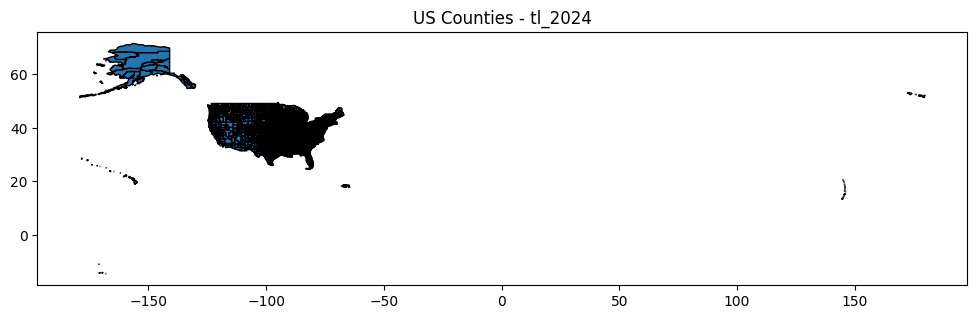

In [171]:
# Plot the counties
county_gdf.plot(figsize=(12, 8), edgecolor='black')
plt.title("US Counties - tl_2024")
plt.show()

In [173]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

# Convert passenger_df to a GeoDataFrame
passenger_df['geometry'] = passenger_df.apply(
    lambda row: Point(row['origin_longitude'], row['origin_latitude']), axis=1
)

passenger_gdf = gpd.GeoDataFrame(passenger_df, geometry='geometry', crs='EPSG:4326')  # WGS84


C:\Users\USVV724227\AppData\Local\Temp\ipykernel_43512\685375465.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  passenger_df['geometry'] = passenger_df.apply(


In [174]:
county_gdf = county_gdf.to_crs('EPSG:4326')

In [175]:
joined_gdf = gpd.sjoin(passenger_gdf, county_gdf, how='left', predicate='intersects')


In [176]:
print(joined_gdf[['origin_latitude', 'origin_longitude', 'NAME', 'STATEFP', 'COUNTYFP']].head())


     origin_latitude  origin_longitude       NAME STATEFP COUNTYFP
844        32.724246       -117.232023  San Diego      06      073
845        33.161455       -117.349183  San Diego      06      073
846        32.724312       -117.162771  San Diego      06      073
847        33.121223       -117.163434  San Diego      06      073
848        32.749102       -117.182250  San Diego      06      073


In [177]:
joined_gdf['STATEFP'].value_counts()

STATEFP
06    3985
04       2
Name: count, dtype: int64

In [179]:
joined_gdf['NAME'].value_counts(dropna=False)

NAME
San Diego    3836
NaN           140
Riverside     102
Orange         31
Imperial       16
Yuma            2
Name: count, dtype: int64

In [180]:
null_counties = joined_gdf[joined_gdf['NAME'].isna()]
origin_state_counts = null_counties['origin_state'].value_counts()
print(origin_state_counts)

origin_state
BC    140
Name: count, dtype: int64


In [183]:
working_df['weighted_value']

0        10.854572
1         6.534190
2        10.854572
3         6.534190
4         6.534190
           ...    
4966      1.568720
4967    267.210668
4968      2.526359
4969      4.921768
4970      0.944332
Name: weighted_value, Length: 4786, dtype: float64

In [181]:
working_df['resident_visitor_purpose_label'].value_counts()

resident_visitor_purpose_label
VISITOR_NON_BUSINESS     1600
RESIDENT_NON_BUSINESS    1262
VISITOR_BUSINESS          828
EMPLOYEE                  659
RESIDENT_BUSINESS         437
Name: count, dtype: int64

In [185]:
crosstab = pd.pivot_table(
    working_df,
    values='weighted_value',
    index='resident_visitor_purpose_label',
    columns='main_mode_label',
    aggfunc='sum',
    fill_value=0
)

crosstab

main_mode_label,AIRPORT_FLYER_SHUTTLE,BUS_992,MICROMOBILITY_PERSONAL,MICROMOBILITY_SHARED,OTHER,PERSONAL_CAR_DROPPED_OFF_PICKED_UP,PERSONAL_CAR_PARKED,PUBLIC_TRANSPORTATION,RENTAL_CAR,RIDEHAIL_TAXI,SHARED_SHUTTLE_VAN,WALK
resident_visitor_purpose_label,,,,,,,,,,,,
EMPLOYEE,141.918902,516.201008,108.545722,10.854572,0.000000,347.346310,4493.792879,54.272861,21.709144,162.818583,130.254866,10.854572
RESIDENT_BUSINESS,1.270790,7.830357,0.000000,0.000000,34.206529,942.839078,209.530809,8.968606,16.334023,1391.592890,303.024092,134.798542
RESIDENT_NON_BUSINESS,13.768402,31.092302,0.000000,0.000000,28.440070,3935.517296,2533.495431,18.751547,137.572132,3180.578952,80.917327,1.568720
VISITOR_BUSINESS,7.790294,19.908478,0.000000,0.000000,1001.471183,424.517888,8.553208,1.923523,1266.642024,4103.419910,1841.566160,5.415767
VISITOR_NON_BUSINESS,20.604681,53.286669,0.000000,0.000000,63.681223,3218.895391,63.545764,16.828023,7287.691784,4848.812572,586.578484,29.764791
